## Unit 3, Lesson 3. Challenge

Engineer your features, then create three models. Each model will be run on a training set and a test-set (or multiple test-sets, if you take a folds approach). The models should be:

- Vanilla logistic regression
- Ridge logistic regression
- Lasso logistic regression


In [102]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [103]:
df=pd.read_csv("../crx.data.txt", engine='python', header=None, names = [
"Male",
"Age",
"Debt",
"Married",
"BankCustomer",
"EducationLevel",
"Ethnicity",
"YearsEmployed",
"PriorDefault",
"Employed",
"CreditScore",
"DriversLicense",
"Citizen",
"ZipCode",
"Income",
"Approved",])

df = df.drop('ZipCode', axis=1);

In [104]:
# drop missing values
for col in df.columns:
    df = df[~df[col].isin(['?'])]

In [105]:
# transform coded values to binary
df.Approved.replace(['+', '-'], ['1', '0'], inplace=True)
df.Male.replace(['b', 'a'], ['0', '1'], inplace=True)
df.DriversLicense.replace(['t', 'f'], ['1', '0'], inplace=True)
df.Employed.replace(['t', 'f'], ['1', '0'], inplace=True)
df.PriorDefault.replace(['t', 'f'], ['1', '0'], inplace=True)

In [106]:
# convert str to float type for Age
df['Age'] = df.Age.astype('float')
df['Employed'] = df.Employed.astype('int')
df['PriorDefault'] = df.PriorDefault.astype('int')
df['DriversLicense'] = df.DriversLicense.astype('int')
df['Approved'] = df.Approved.astype('int')

In [107]:
df.head(3)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
0,0,30.83,0.00,u,g,w,v,1.25,1,1,1,0,g,0,1
1,1,58.67,4.46,u,g,q,h,3.04,1,1,6,0,g,560,1
2,1,24.50,0.50,u,g,q,h,1.50,1,0,0,0,g,824,1


In [108]:
df['YearsEmployed_Income'] = df['YearsEmployed'] * df['Income']
df['Income_sqrt'] = np.sqrt(df['Income'])
df['CreditScore2'] = df['CreditScore'] ** 2
df['Age2'] = df['Age'] ** 2
df['Debt3'] = df['Debt'] ** 3

In [109]:
df = pd.get_dummies(df)

In [123]:
Y = df['Approved']
X = df.loc[:, ~(df.columns).isin(['Approved'])]

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

#### Vanilla Logistic Regression

In [133]:
lr = linear_model.LogisticRegression(C=1e9)
lr.fit(X_train, y_train.ravel())
lr.score(X_test, y_test)

0.84848484848484851

#### Ridge Regression

In [127]:
ridgeregrBig = linear_model.Ridge(alpha=10)
ridgeregrBig.fit(X_train, y_train)
ridgeregrBig.score(X_test, y_test)

0.51573403270051044

#### Lasso Regression

In [128]:
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train, y_train)
lassBig.score(X_test, y_test)

0.12469874108612565

In [130]:
lr_param = np.append(lr.coef_, lr.intercept_)
ridge_param = np.append(ridgeregrBig.coef_, ridgeregrBig.intercept_)
lass_param = np.append(lassBig.coef_, lassBig.intercept_)

compare = np.column_stack((lr_param, ridge_param, lass_param))

prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})

print(prettycompare)

[[-0.061 -0.005 0.000]
 [-0.007 0.002 0.000]
 [0.035 0.011 0.000]
 [3.407 0.518 0.000]
 [0.731 0.082 0.000]
 [0.078 0.012 0.013]
 [0.047 0.008 0.000]
 [0.000 -0.000 -0.000]
 [0.000 -0.000 -0.000]
 [0.021 0.005 0.009]
 [-0.001 -0.000 -0.000]
 [0.001 0.000 0.000]
 [-0.000 -0.000 0.000]
 [-0.396 -0.007 -0.000]
 [-0.162 0.007 0.000]
 [0.575 0.057 0.000]
 [-0.359 -0.014 0.000]
 [-0.774 -0.044 -0.000]
 [-0.359 -0.014 0.000]
 [0.575 0.057 0.000]
 [-0.774 -0.044 -0.000]
 [-0.485 -0.056 -0.000]
 [-0.117 -0.012 0.000]
 [1.432 0.098 0.000]
 [0.140 -0.002 -0.000]
 [0.258 0.034 0.000]
 [-1.346 -0.105 -0.000]
 [-0.730 -0.051 -0.000]
 [-0.312 -0.026 -0.000]
 [-0.917 -0.065 -0.000]
 [-0.267 -0.007 0.000]
 [-0.297 0.007 0.000]
 [0.040 0.011 0.000]
 [0.789 0.065 0.000]
 [1.254 0.108 0.000]
 [-0.204 -0.013 -0.000]
 [0.168 0.006 -0.000]
 [-0.723 -0.024 -0.000]
 [0.340 0.036 0.000]
 [0.423 0.043 0.000]
 [0.611 0.054 0.000]
 [-0.040 -0.007 -0.000]
 [-0.431 -0.026 -0.000]
 [-0.701 -0.070 -0.000]
 [-0.463 -0.

In [148]:
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step
        
lr_r2 = []        
rigde_r2 = []
lasso_r2 = []
lambd_values = []

for lambd in frange(0.0001, 0.3, 0.0005):
    lr = linear_model.LogisticRegression(C=lambd)
    lr.fit(X_train, y_train.ravel())
    lr_r2.append(lr.score(X_test, y_test))
    ridgeregrBig = linear_model.Ridge(alpha=lambd)
    ridgeregrBig.fit(X_train, y_train)
    rigde_r2.append(ridgeregrBig.score(X_test, y_test))
    lassBig = linear_model.Lasso(alpha=lambd)
    lassBig.fit(X_train, y_train)
    lasso_r2.append(lassBig.score(X_test, y_test))
    lambd_values.append([lambd]) 

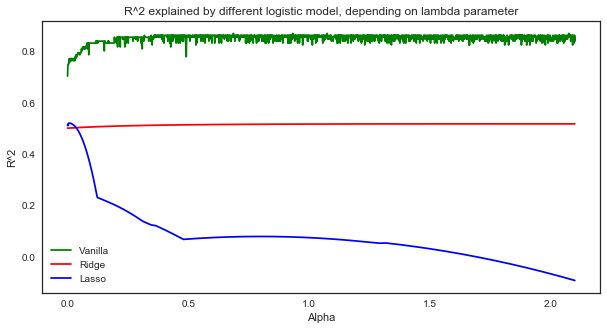

In [149]:
plt.figure(figsize=(10,5))
plt.plot(lambd_values,lr_r2, 'g', lambd_values, rigde_r2, 'r', lambd_values, lasso_r2, 'b')
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.legend(['Vanilla','Ridge','Lasso'])
plt.title('R^2 explained by different logistic model, depending on lambda parameter')
plt.show()

In [ ]:
## C parameter? 
## Scale of lambda is different